# --- Day 24: Electromagnetic Moat ---

The CPU itself is a large, black building surrounded by a bottomless pit. Enormous metal tubes extend outward from the side of the building at regular intervals and descend down into the void. There's no way to cross, but you need to get inside.

No way, of course, other than building a bridge out of the magnetic components strewn about nearby.

Each component has two ports, one on each end. The ports come in all different types, and only matching types can be connected. You take an inventory of the components by their port types (your puzzle input). Each port is identified by the number of pins it uses; more pins mean a stronger connection for your bridge. A 3/7 component, for example, has a type-3 port on one side, and a type-7 port on the other.

Your side of the pit is metallic; a perfect surface to connect a magnetic, zero-pin port. Because of this, the first port you use must be of type 0. It doesn't matter what type of port you end with; your goal is just to make the bridge as strong as possible.

The strength of a bridge is the sum of the port types in each component. For example, if your bridge is made of components 0/3, 3/7, and 7/4, your bridge has a strength of 0+3 + 3+7 + 7+4 = 24.

For example, suppose you had the following components:

```
0/2
2/2
2/3
3/4
3/5
0/1
10/1
9/10
```

With them, you could make the following valid bridges:

```
0/1
0/1--10/1
0/1--10/1--9/10
0/2
0/2--2/3
0/2--2/3--3/4
0/2--2/3--3/5
0/2--2/2
0/2--2/2--2/3
0/2--2/2--2/3--3/4
0/2--2/2--2/3--3/5
```

(Note how, as shown by 10/1, order of ports within a component doesn't matter. However, you may only use each port on a component once.)

Of these bridges, the strongest one is `0/1--10/1--9/10`; it has a strength of `0+1 + 1+10 + 10+9 = 31`.

**What is the strength of the strongest bridge you can make with the components you have available?**

First up, converting the stringy input into ints stored in a list:

In [3]:
# the puzzle input
with open('puzzle_inputs/day24_input.txt') as f:
    data = f.read().strip().split("\n")
puzzle_input = [[int(i) for i in line.split("/")] for line in data]
print("Number of bridges", len(puzzle_input))
puzzle_input[:6]

Number of bridges 54


[[48, 5], [25, 10], [35, 49], [34, 41], [35, 35], [47, 35]]

Starting with the test input:

In [4]:
test_input = [[int(i) for i in l.split("/")] for l in """0/2
2/2
2/3
3/4
3/5
0/1
10/1
9/10""".strip().split("\n")]
test_input

[[0, 2], [2, 2], [2, 3], [3, 4], [3, 5], [0, 1], [10, 1], [9, 10]]

hmmm, this could be a graph problem, or recursive or even a brute force one.

## Recursive solution for part one:

This looks like a classic build a graph problem where the edges go both ways and the weights for each edge is the sum of the nodes:

In [13]:
def strongest_bridge(last=0, comps=test_input):
    """takes in a port to connect the next component to 
    and a list of remaining components and returns the strongest bridge"""
    the_bridge_we_are_looking_for = []
    high_score = 0
    
    for i, comp in enumerate(comps):
        if comp[0] == last or comp[1] == last:
            # make a bridge recursively, passing in the list of components minus current component
            next_port = comp[1] if comp[0] == last else comp[0]
            new_bridge = comp + strongest_bridge(next_port, comps[:i]+comps[i+1:])
            
            if sum(new_bridge) > high_score: # we want to return the strongest bridge
                high_score = sum(new_bridge)
                the_bridge_we_are_looking_for = new_bridge    
    
    return the_bridge_we_are_looking_for

print(test_input)
b = strongest_bridge(0, test_input)
b, sum(b)

[[0, 2], [2, 2], [2, 3], [3, 4], [3, 5], [0, 1], [10, 1], [9, 10]]


([0, 1, 10, 1, 9, 10], 31)

Solution to part one:

In [14]:
sum(strongest_bridge(0, puzzle_input))

1656

In [12]:
%%timeit

sum(strongest_bridge(0, puzzle_input))

5.44 s ± 512 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


The answer is `1656` but the recursive solution is very slow, taking ~6 seconds for a pretty small input of only 54 connectors.

# Part 2

The bridge you've built isn't long enough; you can't jump the rest of the way.

In the example above, there are two longest bridges:

- `0/2--2/2--2/3--3/4`
- `0/2--2/2--2/3--3/5`

Of them, the one which uses the 3/5 component is stronger; its strength is `0+2 + 2+2 + 2+3 + 3+5 = 19`.

**What is the strength of the longest bridge you can make?** If you can make multiple bridges of the longest length, pick the strongest one.

## recursive solution to part two

This is one of the easier part twos, as it just requires a minor modification to part one.

In [15]:
def strongest_bridge(last=0, comps=test_input):
    """takes in a port to connect the next component to 
    and a list of remaining components and returns the longest strongest bridge"""
    the_bridge_we_are_looking_for = []
    high_score = 0
    longest_length = 0
    
    for i, comp in enumerate(comps):
        if comp[0] == last or comp[1] == last:
            # make a bridge recursively, passing in the list of components minus current component
            next_port = comp[1] if comp[0] == last else comp[0]
            new_bridge = comp + strongest_bridge(next_port, comps[:i]+comps[i+1:])
            
            if len(new_bridge) > longest_length: # save longest bridge found
                high_score = sum(new_bridge)
                longest_length = len(new_bridge)
                the_bridge_we_are_looking_for = new_bridge
            
            elif len(new_bridge) == longest_length: # if same length, save stronger bridge
                if sum(new_bridge) > high_score:
                    the_bridge_we_are_looking_for = new_bridge
                    high_score = sum(new_bridge)
            
    return the_bridge_we_are_looking_for

print(test_input)
b = strongest_bridge(0, test_input)
b, sum(b)

[[0, 2], [2, 2], [2, 3], [3, 4], [3, 5], [0, 1], [10, 1], [9, 10]]


([0, 2, 2, 2, 2, 3, 3, 5], 19)

In [16]:
b = strongest_bridge(0, puzzle_input)
sum(b)

1642

`1642` is the answer to part two.

# todo

- make a graph and use DFS of BFS to find paths
- make a networkx graph
- do a stack based solution

## graph solution

first up, using networkx to eyeball:

In [280]:
import networkx as nx
G = nx.Graph()
G.add_edges_from(test_input)
G.edges

EdgeView([(0, 2), (0, 1), (2, 2), (2, 3), (3, 4), (3, 5), (1, 10), (10, 9)])

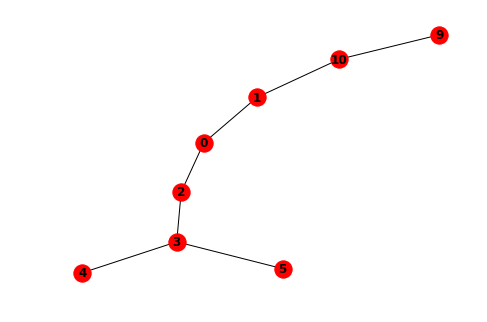

In [281]:
%matplotlib inline
import matplotlib.pyplot as plt
nx.draw(G, with_labels=True, font_weight='bold')

In [318]:
def make_graph(edges=test_input):
    """takes in a list of edges and returns a dict"""
    graph = defaultdict(list)
    
    for x,y in edges:
        graph[x].append(y)
        graph[y].append(x)

    return edges, graph

edges, graph = make_graph()
print(edges)
graph

[[0, 2], [2, 2], [2, 3], [3, 4], [3, 5], [0, 1], [10, 1], [9, 10]]


defaultdict(list,
            {0: [2, 1],
             1: [0, 10],
             2: [0, 2, 2, 3],
             3: [2, 4, 5],
             4: [3],
             5: [3],
             9: [10],
             10: [1, 9]})

to complete, but in the meantime, a start on a stack based solution:

## Stack based solution:

INCOMPLETE, TODO

In [65]:
from collections import deque
from collections import defaultdict

def bridges(port=0, comps=test_input, debug=False):
    """takes in starting port & a list of components and returns all possible bridges in a list"""
    queue = deque()

    graph = defaultdict(list)
    for edge in test_input:
        graph[edge[0]].append(edge)
    if debug: print(graph)
    
    # adding our starting components to the queue
    for edge in graph[port]:
        queue.append(edge)
    if debug: print("Starting with:", queue)
        
    all_bridges = [] # storing all the bridges found
    
    i = 0
    while queue:
        bridge = queue.pop()
        if debug: print("Bridge:", bridge)
        port = bridge[1]
        
        if bridge not in all_bridges:
            all_bridges.append(bridge)
            if debug == True: print(bridge)
            
            # now to get a list of valid components to make the bridge longer
            remaining_comps = # todo
            
            next_comps = [comp for comp in remaining_comps if any([p==next_port for p in comp])]
            
            for comp in next_comps:
                if next_port[0] == comp[0]:
                    next_port = comp[1] if comp[0] == next_port else comp[0]
                    br = bridge + comp
                    queue.appendleft(br)
        if i > 10000000:
            break
    
    return all_bridges
        
    
bridges(debug=True)

SyntaxError: invalid syntax (<ipython-input-65-6e930d3a0318>, line 31)